In [37]:
import util
import search
from graphviz import Graph, Digraph
from IPython.display import display

# Uninformed Search

## A search problem

In [90]:
class graph_problem(search.SearchProblem):
    def __init__(self, vertices, edges):
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            (self.G[v2])[v1] = c
        self.start = vertices[0]
        self.goal = vertices[-1]
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        successors = [(suc, state + '->' + suc, 
                       (self.G[state])[suc]) for suc in self.G[state]]
        return successors
    
    def getDot(self, color):
        dot = Graph(graph_attr = {'size':'3.5'})
        for node in self.G:
            if not node in color:
                dot.node(node)
            else:
                dot.node(node, style = 'filled', color = color[node])
        for n1 in self.G:
            for n2 in self.G[n1]:
                if n1 < n2:
                    dot.edge(n1, n2)
        return dot


{'s': {'r': 1, 'w': 1}, 'r': {'s': 1, 'v': 1}, 'u': {'y': 1, 't': 1}, 't': {'x': 1, 'u': 1, 'w': 1}, 'w': {'x': 1, 's': 1, 't': 1}, 'v': {'r': 1}, 'y': {'x': 1, 'u': 1}, 'x': {'y': 1, 't': 1, 'w': 1}}
{'x': 1, 's': 1, 't': 1}
s
True


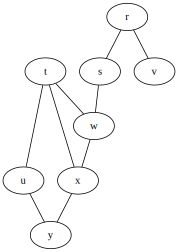

In [132]:
edges1 = [('v', 'r', 1), ('r', 's', 1), ('w', 't', 1),('s','w', 1),
         ('w', 'x', 1), ('t', 'x', 1), ('t', 'u', 1), ('x', 'y', 1),
         ('u', 'y', 1)]
vertices1 = ['s', 'r', 't', 'u', 'v', 'w', 'x', 'y'] 
problem1 = graph_problem(vertices1, edges1)
print problem1.G
print problem1.G['w']
print problem1.getStartState()
print problem1.isGoalState('y')
dot = problem1.getDot({})
display(dot)

## General graph search

In [83]:
class search_tree():
    def __init__(self):
        self.graph = Digraph()
        
    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph


In [147]:
def general_ui_search(problem, frontier_class):
    visited = {}
    tree = search_tree()
    state = problem.getStartState()
    visited[state] = 'gray'
#    display(problem.getDot(visited))
    frontier = frontier_class()
    frontier.push((state, []))
    while not frontier.isEmpty():
        u, actions = frontier.pop()
#        print 'Pop:', u 
        for v, action, cost in problem.getSuccessors(u):
            if not v in visited:
                tree.addEdge(u, action, v)
                if problem.isGoalState(v):
                    return  actions + [action], tree
                visited[v] = 'gray'
                frontier.push((v, actions + [action]))
#            display(problem.getDot(visited))
#            display(tree.getDot())
        visited[u] = 'green'
    return [], tree

## Depth-first search

In [148]:
def dfs(problem):
   return general_ui_search(problem, util.Stack) 

['s->w', 'w->t', 't->u', 'u->y']


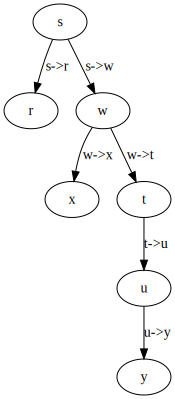

In [149]:
actions, tree = dfs(problem1)
print actions
display(tree.getDot())

## Breadth-first search

In [150]:
def bfs(problem):
   return general_ui_search(problem, util.Queue) 

['s->w', 'w->t', 't->u', 'u->y']


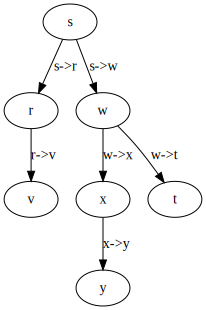

In [151]:
actions1, tree1 = bfs(problem1)
print actions
display(tree1.getDot())